<h1 style="color: #FF8C00;">Portfolio Analyst. Prueba Python.</h1>

---

La siguiente prueba consistirá en hacer una serie de cálculos y gráficos para analizar un conjunto de activos financieros.

Para ello deberás desarrollar el código necesario que permita realizar cada una de las tareas.


<h2 style="color: #FF6347;">Import de librerías a usar</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

In [7]:
from datetime import datetime, date

<h1 style="color: #FF8C00;">Ejercicio 1. Carga de datos y gráfico de precios.</h1>

En este primer ejercicio debes cargar el fichero que contiene los precios de los activos financieros a analizar. Este fichero se llama `financial_assets_prices.csv`.

Una vez cargados los precios de los activos, debes pintarlos en un gráfico temporal. Ten en cuenta que para que puedan ser comparados deben comenzar todas las series en el mismo valor.

<h2 style="color: #FF6347;">Carga de datos</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [12]:
df = pd.read_csv("financial_assets_prices.csv")

In [14]:
df.head(9)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
5,2019-01-09,230.1550,57.630,26.197380,304.67,52.86
6,2019-01-10,230.4994,57.667,26.348124,304.78,52.89
7,2019-01-11,230.8193,57.692,26.370964,305.27,52.81
8,2019-01-14,231.0823,57.589,26.192812,305.26,52.62


In [16]:
# Convirtiendo date to datetime para poder manipular los datos
df['date'] = pd.to_datetime(df['date'])

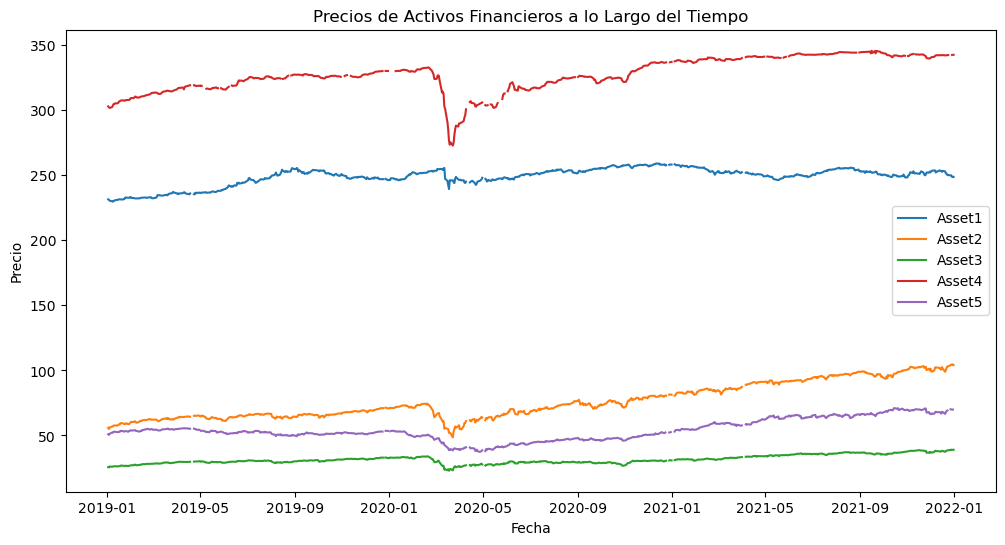

In [18]:
df.set_index("date", inplace=True)
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.title("Precios de Activos Financieros a lo Largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 2. Rendimientos diarios porcentuales.</h1>

En este segundo ejercicio debes calcular los rendimientos diarios porcentuales de cada uno de los activos y obtener la siguiente información de ellos:
- Calcular la matriz de correlaciones entre los 5 activos.
- Realizar un gráfico de dispersión entre los rendimientos de 2 activos.

<h2 style="color: #FF6347;">Cálculo de rendimientos diarios.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

###Definimos la columna de fecha como el índice del DataFrame usando set_index('date'). Esto permite que los valores de cada activo queden organizados por fecha.


In [29]:
df.set_index('date', inplace=True)
df

KeyError: "None of ['date'] are in the columns"

In [ ]:
returns = df[['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']].pct_change() * 100

In [ ]:
returns = returns.dropna()
returns

In [ ]:
#Para calcular la matriz de correlación entre los rendimientos de los activos, podemos usar returns.corr():

correlation_matrix = returns.corr()
correlation_matrix


<h2 style="color: #FF6347;">Cálculo de la matriz de correlaciones.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [ ]:
plt.figure(figsize=(20, 6))

for column in returns.columns:
    plt.plot(returns.index, returns[column], label=column)

plt.show()

<h2 style="color: #FF6347;">Gráfico de dispersión entre los rendimientos de 2 activos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=returns['Asset1'], y=returns['Asset2'])
plt.title("Dispersión de Rendimientos entre Asset1 y Asset2")
plt.xlabel("Rendimiento diario de Asset1 (%)")
plt.ylabel("Rendimiento diario de Asset2 (%)")
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 3. Análisis de una cartera</h1>

Este tercer ejercicio consiste en calcular y analizar los resultados de una cartera. Para ello será necesario cargar el fichero con los pesos que tiene cada uno de los activos en cada uno de los días. Este fichero se llama `portfolio_weights.csv`.

Para completar el ejercicio, será necesario calcular:
- Gráfico de área de los pesos.
- Gráfico de la rentabilidad histórica acumulada de la cartera.
- Rentabilidad anualizada de la cartera.
- Volatilidad anualizada de la cartera. (Puedes usar el factor de anualización de 261 días)

Extra: Gráfico de área de los pesos de los activos agrupándolos por familia. Esta información está contenida en el fichero `financial_assets_information.csv`.

<h2 style="color: #FF6347;">Gráfico de área de los pesos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [ ]:
df2 = pd.read_csv("portfolio_weights.csv")

In [ ]:
df2

In [ ]:
df2['date'] = pd.to_datetime(df2['date'])
df2.set_index('date', inplace=True)


In [ ]:
df2_corr = df2.corr()

In [ ]:
df2.corr()

In [ ]:
plt.figure(figsize=(20, 17))

# Drawing the heatmap for the numerical columns
sns.heatmap(df2_corr, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

<h2 style="color: #FF6347;">Gráfico de la rentabilidad histórica acumulada de la cartera.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [ ]:

weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

returns = df2[['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']]

plt.show()

<h2 style="color: #FF6347;">Rentabilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

<h2 style="color: #FF6347;">Volatilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

<h2 style="color: #FF6347;">Extra. Gráfico de área de los pesos de los activos agrupándolos por familia.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

NameError: name 'df' is not defined